# Applied Machine Learning - Assignment 2

Welcome to the second assignment of the Applied Machine Learning course. This notebook will guide you through solving a complete machine learning problem using the provided dataset. We will explore various machine learning techniques, conduct preliminary data analysis, preprocess the data, and evaluate multiple models to achieve the most accurate classifier. Each part of the assignment aims to solidify the concepts discussed in lectures through hands-on practice.

## Table of Contents
1. [Introduction](#Introduction)
2. [Preliminary Data Analysis](#Preliminary-Data-Analysis)
3. [Model Training and Evaluation](#Model-Training-and-Evaluation)
4. [Hyperparameter Tuning](#Hyperparameter-Tuning)
5. [Final Model Evaluation](#Final-Model-Evaluation)
6. [Conclusion](#Conclusion)

**Instructor:** Prof. Moshe Sipper  
**Teaching Assistant:** Raz Lapid  
**Spring 2024**

---

## Introduction
This section introduces the dataset and the primary objectives of this assignment. We will handle the dataset, perform preliminary data analysis, train and evaluate different models, and optimize the best model's hyperparameters to achieve the highest accuracy. This assignment focuses on applying the concepts learned in the course to a real-world dataset, ensuring a thorough understanding of machine learning workflows and techniques.


In [ ]:
!pip install seaborn
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 7.8 MB/s eta 0:00:00


In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
# Load the dataset
pollen_data_dict = pd.read_pickle('ass2.pickle')

# Convert each split to a DataFrame
train_data = pd.DataFrame(pollen_data_dict['train'])
dev_data = pd.DataFrame(pollen_data_dict['dev'])
test_data = pd.DataFrame(pollen_data_dict['test'])


       f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  ...  f33  f34  f35  f36  f37  \
51905   1   0   0   0   0   0   2   1   2   2  ...    0    0    0    2    0   
52612   0   0   0   0   0   0   2   1   0   0  ...    0    0    0    2    0   
61699   2   1   2   1   1   0   2   2   0   0  ...    0    0    0    1    0   
6291    0   0   0   0   0   0   0   0   0   0  ...    0    0    0    2    0   
17484   0   0   0   0   0   0   1   1   2   0  ...    0    0    0    2    1   

       f38  f39  f40  f41  target  
51905    0    0    0    0       2  
52612    0    0    0    0       2  
61699    0    0    0    0       2  
6291     0    0    0    0       2  
17484    2    0    0    0       2  

[5 rows x 43 columns]
                 f0            f1            f2            f3            f4  \
count  40533.000000  40533.000000  40533.000000  40533.000000  40533.000000   
mean       0.959539      0.540054      0.270890      0.131745      0.051982   
std        0.834109      0.779471      0.612657  

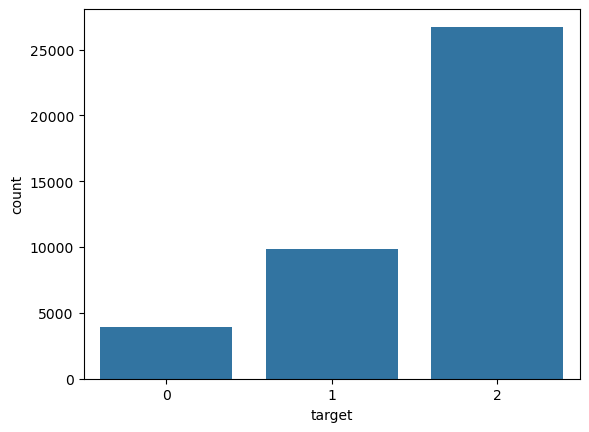

In [ ]:
# Preliminary data analysis
print(train_data.head())
print(train_data.describe())
print(train_data.info())

sns.countplot(x='target', data=train_data)
plt.show()

# Preliminary Data Analysis

### Output 1: First 5 Rows of the Data
The output displays the first 5 rows of the training dataset. This provides an initial understanding of the data structure, including the feature values and the target labels.

**Key Insight**:
- The dataset has 43 columns including the target variable.
- The features seem to be numerical and discrete, with values primarily between 0 and 2.

### Output 2: Descriptive Statistics
The `describe()` method provides a summary of the dataset's statistical properties. This includes:
- **Count**: The number of non-null entries for each feature.
- **Mean**: The average value of each feature.
- **Standard Deviation (std)**: The spread of the feature values around the mean.
- **Min**: The minimum value of each feature.
- **25th Percentile (25%)**: The value below which 25% of the data falls.
- **Median (50%)**: The middle value of each feature.
- **75th Percentile (75%)**: The value below which 75% of the data falls.
- **Max**: The maximum value of each feature.

This summary helps to understand the distribution and spread of each feature in the dataset.

**Key Insight**:
- Most features have a mean value close to 0 or 1, suggesting a high occurrence of these values.
- Some features have a wide range of values (from 0 to 2), while others have very narrow ranges.
- The `target` variable has a mean of 1.56, indicating an imbalanced distribution with more instances of higher classes.

### Output 3: DataFrame Information
The `info()` method provides a concise summary of the DataFrame. This includes:
- The number of entries (rows) in the DataFrame.
- The names and data types of each column.
- The number of non-null entries for each column.

This information is useful for checking the data types and identifying any missing values in the dataset.

**Key Insight**:
- There are 40,533 entries in the dataset.
- All columns are of integer data type, confirming the features are discrete and numerical.
- There are no missing values in any of the columns, ensuring data completeness.

### Output 4: Count Plot of the Target Variable
The count plot visualizes the distribution of the target variable. It shows the number of occurrences for each class in the target variable. In this case, it indicates that the dataset has an imbalanced class distribution, with class `2` being the most frequent and class `0` being the least frequent.

**Key Insight**:
- The target variable is highly imbalanced, with class `2` being significantly more frequent than classes `0` and `1`.
- This imbalance might impact model performance and may need to be addressed using techniques like SMOTE or class weighting.


In [ ]:
# Visualize the distribution of features
train_data.hist(figsize=(90, 90))
plt.suptitle('Histogram for Each Feature in the Pollen Dataset', y=1.02)
plt.show()

In [ ]:
plt.figure(figsize=(150, 120))
sns.boxplot(data=train_data)
plt.title('Box Plots to Detect Outliers in the Pollen Dataset')
plt.show()

In [ ]:
# sns.pairplot(pollen_data, hue='target')
# plt.show()
# Box plots to detect outliers
# Correlation matrix
corr_matrix = train_data.corr()
plt.figure(figsize=(200, 150))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features in the Pollen Dataset')
plt.show()


# Visualization of Feature Distributions

### Output 1: Histogram for Each Feature
Histograms are plotted for each feature in the dataset to visualize their distributions.

**Key Insights**:
- Most features have a highly skewed distribution, with values clustered around 0 or 1.
- Some features show a uniform distribution across their range, while others have a few distinct peaks.

### Output 2: Box Plots to Detect Outliers
Box plots are generated for each feature to identify outliers and understand the spread of the data.

**Key Insights**:
- The majority of features have a large number of outliers, indicated by the dots outside the whiskers of the box plots.
- The interquartile range (IQR) for many features is quite small, suggesting that the central 50% of the data is tightly clustered around the median.
- Some features exhibit significant variability, as indicated by the length of the whiskers.

### Output 3: Correlation Matrix of Features
A heatmap of the correlation matrix is generated to show the pairwise correlation coefficients between features.

**Key Insights**:
- There are strong positive correlations (close to 1) along the diagonal, as expected since each feature is perfectly correlated with itself.
- Some features exhibit high positive or negative correlations with each other, suggesting that they may be capturing similar information.
- Most features have weak or no correlation with others, indicating that they provide unique information.


# Splitting the Data and Preparing for Model Training

### Explanation:
- **X_train**: Features of the training set.
- **y_train**: Target variable of the training set.
- **X_dev**: Features of the development (validation) set.
- **y_dev**: Target variable of the development (validation) set.
- **X_test**: Features of the test set.
- **y_test**: Target variable of the test set.

### Key Insight:
- The data is split into features (X) and target (y) for training, development, and testing sets. This separation is essential for training the models on the training data, validating them on the development data, and finally evaluating them on the test data.


In [ ]:
# Split the train and dev into X and y
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
X_dev = dev_data.drop('target', axis=1)
y_dev = dev_data['target']
X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_dev_bin = label_binarize(y_dev, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Binarizing the Target Variable

### Explanation:
- **label_binarize**: Converts the target variable into a binary matrix format suitable for multi-class classification.

### Key Insight:
- Binarizing the target variable is crucial for multi-class classification tasks. It transforms the target into a binary format that is easier for certain models to handle, especially when using techniques like OneVsRest classification.


# Defining Parameter Grids for Grid Search

### Explanation:
- Parameter grids are defined for each model to be used in grid search. These grids contain different hyperparameters and their values to be tested during the model tuning process.

### Key Insight:
- Defining parameter grids allows for systematic exploration of hyperparameters. This helps in finding the best combination of parameters that optimizes the model's performance.


In [ ]:
# Define parameter grids for Grid Search
param_svm = {
    'C': [0.1, 1],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto', 0.001]
}  # Support Vector Classifier

param_grid_knn = {
    'n_neighbors': [9, 11, 13]
}  # KNN we already tried 5 and 7 but it was worse than 9 and 11

param_grid_rf = {
    'n_estimators': [250, 300, 350],
    'max_depth': [None, 10, 50]
}  # Random Forest (9 combinations)

param_grid_ada = {
    'n_estimators': [300, 400, 450],
    'learning_rate': [0.5, 1]
}  # AdaBoost (5 combinations)

param_grid_xgb = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300, 400, 500],
    'max_depth': [9, 11, 13],
    'tree_method': ['gpu_hist']  # Use GPU
}  # XGBoost

param_grid_gb = {
    'learning_rate': [0.2, 0.5],
    'n_estimators': [300, 350, 400],
    'max_depth': [7, 9]
}  # Gradient Boosting (27 combinations, will select 9)

param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}  # Logistic Regression (18 combinations, will select 9)

param_kmeans = {
    'n_clusters': [3, 5, 7]
}  # KMeans (3 combinations)

param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}  # Gaussian Naive Bayes (3 combinations)


# Function to Evaluate and Store Results

### Explanation:
- **Function `evaluate_classifier`**: Evaluates the performance of a classifier and stores the results in a dictionary.
  - **Parameters**:
    - `name`: Name of the classifier.
    - `clf`: The classifier instance.
    - `X_train`: Training features.
    - `y_train`: Training labels.
    - `X_dev`: Development (validation) features.
    - `y_dev`: Development (validation) labels.
    - `results_dict`: Dictionary to store the results.
  - **Process**:
    - The classifier is trained using the OneVsRest strategy for multi-class classification.
    - Predicted labels and probabilities are obtained on the development set.
    - Various evaluation metrics (accuracy, precision, recall, F1 score, and AUC) are calculated.
    - The results are stored in the provided dictionary.
    - Evaluation results are printed.
    - ROC curves are plotted to visualize the classifier's performance for each class.

### Key Insight:
- This function automates the evaluation process for different classifiers, ensuring consistent calculation of performance metrics and easy comparison between models.
- Plotting ROC curves provides a visual representation of the trade-off between true positive rates and false positive rates for each class, aiding in the assessment of model performance.

### Explanation of ROC Curves:
- **ROC Curve (Receiver Operating Characteristic Curve)**: A plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
  - **False Positive Rate (FPR)**: The proportion of actual negatives that are incorrectly identified as positives.
  - **True Positive Rate (TPR) or Sensitivity**: The proportion of actual positives that are correctly identified as positives.
  - The curve is created by plotting the TPR against the FPR at various threshold settings.
  - The area under the ROC curve (AUC) provides an aggregate measure of performance across all possible classification thresholds.

### Key Insight on ROC Curves:
- **AUC (Area Under the Curve)**: AUC values range from 0 to 1. A higher AUC value indicates better model performance.
  - An AUC of 1 represents a perfect model, while an AUC of 0.5 suggests no discrimination (random chance).
  - ROC curves help in comparing different models and selecting the one that provides the best trade-off between sensitivity and specificity.


In [ ]:
# Function to evaluate and store results
def evaluate_classifier(name, clf, X_train, y_train, X_dev, y_dev, results_dict):
    """
    Evaluate the classifier and store the results in a dictionary.

    Parameters:
    - name: Name of the classifier
    - clf: The classifier
    - X_train: Training features
    - y_train: Training labels
    - X_dev: Development features
    - y_dev: Development labels
    - results_dict: Dictionary to store the results
    """
    # Train the classifier using OneVsRest strategy
    ovr_clf = OneVsRestClassifier(clf)
    ovr_clf.fit(X_train, y_train)
    y_pred = ovr_clf.predict(X_dev)

    # Get predicted probabilities
    if hasattr(ovr_clf, "predict_proba"):
        y_prob = ovr_clf.predict_proba(X_dev)
    else:
        y_prob = ovr_clf.decision_function(X_dev)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize to [0, 1]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_dev, y_pred)
    precision = precision_score(y_dev, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_dev, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_dev, y_pred, average='weighted', zero_division=0)

    # Handle the case where y_prob is 1D for binary classification
    if y_prob.ndim == 1:
        roc_auc = roc_auc_score(y_dev, y_prob, average='weighted')
    else:
        roc_auc = roc_auc_score(y_dev, y_prob, average='weighted', multi_class='ovr')

    # Store the results
    results_dict[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': roc_auc
    }

    # Print the evaluation results for the current model
    print(f"Evaluation results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("-" * 40)

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    # Convert y_dev to a NumPy array if it's a pandas Series
    y_dev_array = y_dev.to_numpy() if isinstance(y_dev, pd.Series) else y_dev
    n_classes = y_prob.shape[1] if y_prob.ndim > 1 else 1 # Determine number of classes
    for i in range(n_classes):  # Iterate over classes
        if n_classes > 1:
            fpr[i], tpr[i], _ = roc_curve(y_dev_array[:, i], y_prob[:, i], pos_label=i) # Use y_dev_array here
        else:
            fpr[i], tpr[i], _ = roc_curve(y_dev_array, y_prob)
        plt.plot(fpr[i], tpr[i], label=f'{name} class {i} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend()
    plt.show()


In [ ]:
# Define and fit models
models = [
    ('KNN', KNeighborsClassifier(), param_grid_knn),
    ('Random Forest', RandomForestClassifier(), param_grid_rf),
    ('AdaBoost', AdaBoostClassifier(), param_grid_ada),
    # Set num_class for XGBoost
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', num_class=3), param_grid_xgb),
    ('Gradient Boosting', GradientBoostingClassifier(), param_grid_gb),
    ('Logistic Regression', LogisticRegression(max_iter=10000), param_grid_lr),
    ('Naive Bayes', GaussianNB(), param_grid_gnb)
]

best_models = {}  # Store the best model to avoid another train.
results = {}  # Store the evaluation results for each model

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
# Function to reshape y_prob from (3, 13512, 2) to (13512, 3)
def reshape_y_prob(y_prob):
    print("I got reshaped")
    if y_prob.shape[0] == 3 and y_prob.shape[2] == 2:
        # Transpose to switch axes
        y_prob = np.transpose(y_prob, (1, 2, 0))  # (13512, 2, 3)
        # Reshape to (13512, 6) and then slice to (13512, 3)
        y_prob = y_prob.reshape(13512, 6)[:, :3]
    return y_prob

fitting KNN, with params {'n_neighbors': 9}, this is the 1 time from 3
AUC for KNN with params {'n_neighbors': 9}: 0.8515
fitting KNN, with params {'n_neighbors': 11}, this is the 2 time from 3
AUC for KNN with params {'n_neighbors': 11}: 0.8561
fitting KNN, with params {'n_neighbors': 13}, this is the 3 time from 3
AUC for KNN with params {'n_neighbors': 13}: 0.8550
Best parameters for KNN: {'n_neighbors': 11}
Best ROC AUC score for KNN: 0.8560781871732465
Evaluation results for Best KNN:
Accuracy: 0.7039
Precision: 0.8004
Recall: 0.7039
F1 Score: 0.6952
AUC: 0.8550
----------------------------------------


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


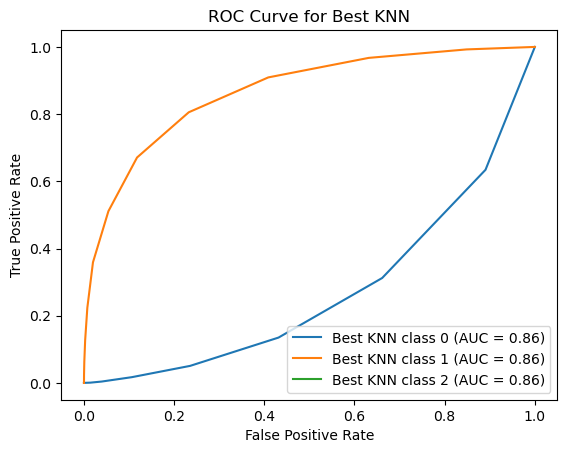

fitting Random Forest, with params {'max_depth': None, 'n_estimators': 250}, this is the 1 time from 9
AUC for Random Forest with params {'max_depth': None, 'n_estimators': 250}: 0.9184
fitting Random Forest, with params {'max_depth': None, 'n_estimators': 300}, this is the 2 time from 9
AUC for Random Forest with params {'max_depth': None, 'n_estimators': 300}: 0.9189
fitting Random Forest, with params {'max_depth': None, 'n_estimators': 350}, this is the 3 time from 9
AUC for Random Forest with params {'max_depth': None, 'n_estimators': 350}: 0.9185
fitting Random Forest, with params {'max_depth': 10, 'n_estimators': 250}, this is the 4 time from 9
AUC for Random Forest with params {'max_depth': 10, 'n_estimators': 250}: 0.8602
fitting Random Forest, with params {'max_depth': 10, 'n_estimators': 300}, this is the 5 time from 9
AUC for Random Forest with params {'max_depth': 10, 'n_estimators': 300}: 0.8618
fitting Random Forest, with params {'max_depth': 10, 'n_estimators': 350}, thi

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


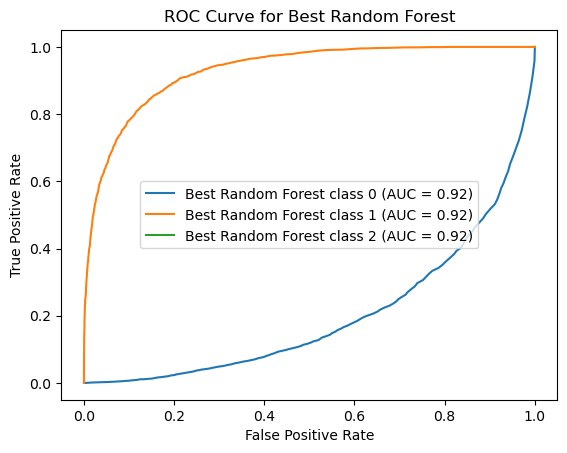

fitting AdaBoost, with params {'learning_rate': 0.5, 'n_estimators': 300}, this is the 1 time from 6


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AUC for AdaBoost with params {'learning_rate': 0.5, 'n_estimators': 300}: 0.8388
fitting AdaBoost, with params {'learning_rate': 0.5, 'n_estimators': 400}, this is the 2 time from 6


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AUC for AdaBoost with params {'learning_rate': 0.5, 'n_estimators': 400}: 0.8430
fitting AdaBoost, with params {'learning_rate': 0.5, 'n_estimators': 450}, this is the 3 time from 6


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AUC for AdaBoost with params {'learning_rate': 0.5, 'n_estimators': 450}: 0.8448
fitting AdaBoost, with params {'learning_rate': 1, 'n_estimators': 300}, this is the 4 time from 6


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AUC for AdaBoost with params {'learning_rate': 1, 'n_estimators': 300}: 0.8506
fitting AdaBoost, with params {'learning_rate': 1, 'n_estimators': 400}, this is the 5 time from 6


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AUC for AdaBoost with params {'learning_rate': 1, 'n_estimators': 400}: 0.8513
fitting AdaBoost, with params {'learning_rate': 1, 'n_estimators': 450}, this is the 6 time from 6


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AUC for AdaBoost with params {'learning_rate': 1, 'n_estimators': 450}: 0.8514
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 450}
Best ROC AUC score for AdaBoost: 0.8513688359908456


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluation results for Best AdaBoost:
Accuracy: 0.7116
Precision: 0.8092
Recall: 0.7130
F1 Score: 0.7091
AUC: 0.8514
----------------------------------------


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


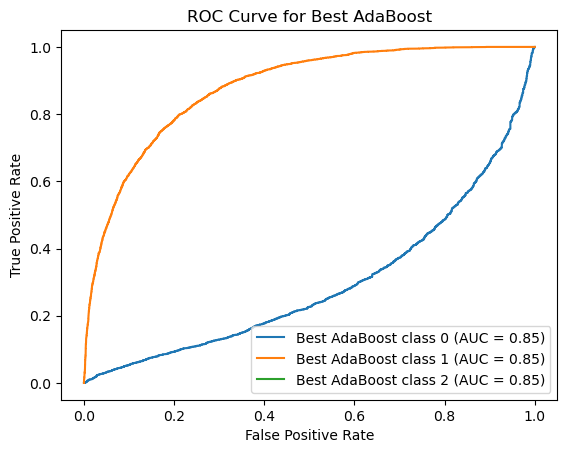

fitting XGBoost, with params {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 300, 'tree_method': 'gpu_hist'}, this is the 1 time from 27
AUC for XGBoost with params {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 300, 'tree_method': 'gpu_hist'}: 0.9464
fitting XGBoost, with params {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 400, 'tree_method': 'gpu_hist'}, this is the 2 time from 27
AUC for XGBoost with params {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 400, 'tree_method': 'gpu_hist'}: 0.9494
fitting XGBoost, with params {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 500, 'tree_method': 'gpu_hist'}, this is the 3 time from 27
AUC for XGBoost with params {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 500, 'tree_method': 'gpu_hist'}: 0.9510
fitting XGBoost, with params {'learning_rate': 0.05, 'max_depth': 11, 'n_estimators': 300, 'tree_method': 'gpu_hist'}, this is the 4 time from 27
AUC for XGBoost with params {'learning_rate': 0

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Evaluation results for Best XGBoost:
Accuracy: 0.8064
Precision: 0.8554
Recall: 0.8341
F1 Score: 0.8421
AUC: 0.9503
----------------------------------------


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


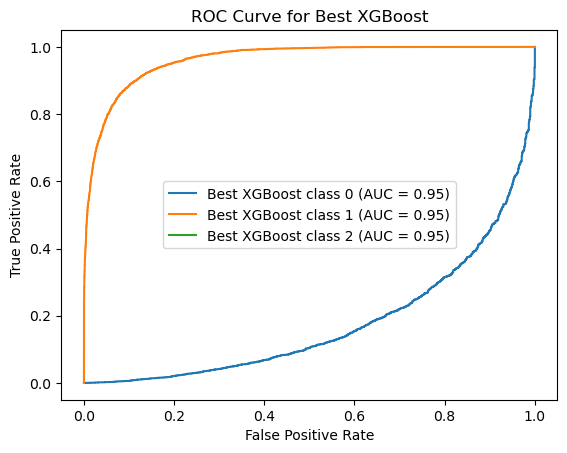

fitting Gradient Boosting, with params {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}, this is the 1 time from 12
AUC for Gradient Boosting with params {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}: 0.9462
fitting Gradient Boosting, with params {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 350}, this is the 2 time from 12
AUC for Gradient Boosting with params {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 350}: 0.9467
fitting Gradient Boosting, with params {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 400}, this is the 3 time from 12
AUC for Gradient Boosting with params {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 400}: 0.9464
fitting Gradient Boosting, with params {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300}, this is the 4 time from 12
AUC for Gradient Boosting with params {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300}: 0.9455
fitting Gradient Boosting, with params {'learning_rate': 0.2, 'max_d

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


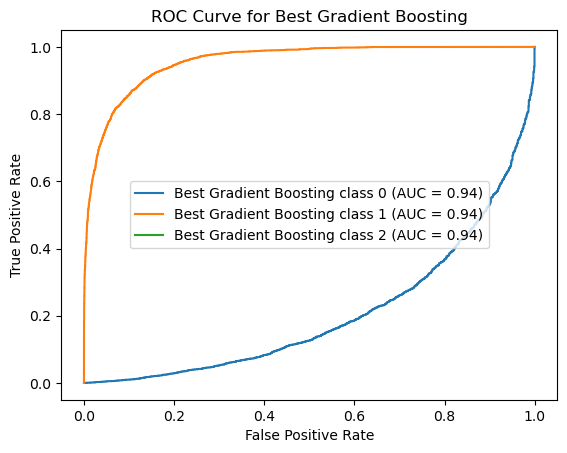

fitting Logistic Regression, with params {'C': 0.1, 'class_weight': None, 'max_iter': 100}, this is the 1 time from 18
AUC for Logistic Regression with params {'C': 0.1, 'class_weight': None, 'max_iter': 100}: 0.6235
fitting Logistic Regression, with params {'C': 0.1, 'class_weight': None, 'max_iter': 200}, this is the 2 time from 18
AUC for Logistic Regression with params {'C': 0.1, 'class_weight': None, 'max_iter': 200}: 0.6235
fitting Logistic Regression, with params {'C': 0.1, 'class_weight': None, 'max_iter': 300}, this is the 3 time from 18
AUC for Logistic Regression with params {'C': 0.1, 'class_weight': None, 'max_iter': 300}: 0.6235
fitting Logistic Regression, with params {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100}, this is the 4 time from 18
AUC for Logistic Regression with params {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100}: 0.6230
fitting Logistic Regression, with params {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 200}, this is the 5 time fro

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


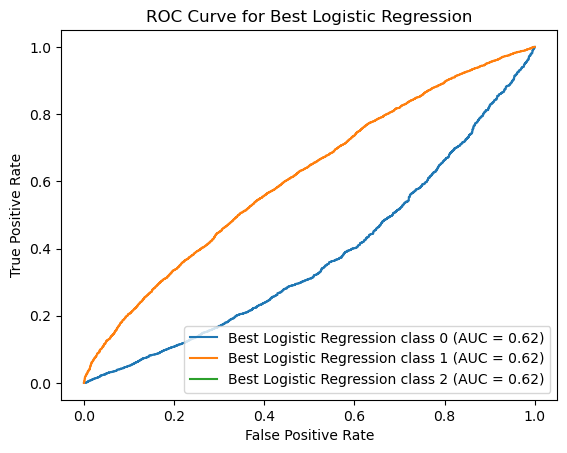

fitting Naive Bayes, with params {'var_smoothing': 1e-09}, this is the 1 time from 3
AUC for Naive Bayes with params {'var_smoothing': 1e-09}: 0.6116
fitting Naive Bayes, with params {'var_smoothing': 1e-08}, this is the 2 time from 3
AUC for Naive Bayes with params {'var_smoothing': 1e-08}: 0.6116
fitting Naive Bayes, with params {'var_smoothing': 1e-07}, this is the 3 time from 3
AUC for Naive Bayes with params {'var_smoothing': 1e-07}: 0.6116
Best parameters for Naive Bayes: {'var_smoothing': 1e-07}
Best ROC AUC score for Naive Bayes: 0.6116201150948919
Evaluation results for Best Naive Bayes:
Accuracy: 0.5582
Precision: 0.5476
Recall: 0.6553
F1 Score: 0.5925
AUC: 0.6116
----------------------------------------


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


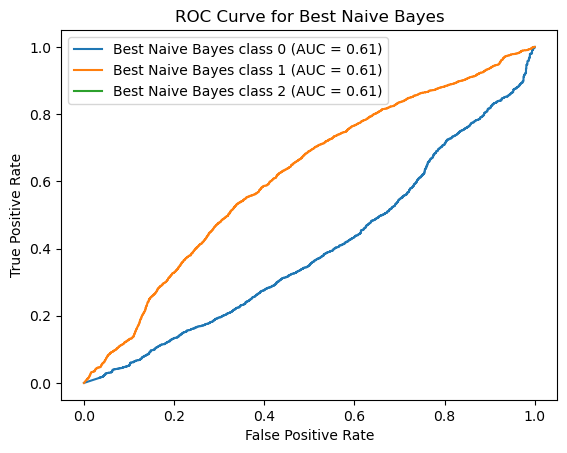

In [ ]:
# Train and evaluate models on SMOTE data using ROC AUC
for name, model, param_grid in models:
    if param_grid:
        best_score = 0  # Initialize with 0 for ROC AUC
        best_params = None
        param_count = 1
        total_params = len(list(ParameterGrid(param_grid)))
        for params in ParameterGrid(param_grid):
            print(f"fitting {name}, with params {params}, this is the {param_count} time from {total_params}")
            # Handle XGBoost differently due to native multi-class support
            if name == 'XGBoost':
                ovr_model = model.set_params(**params)  # Set parameters directly for XGBoost
                ovr_model.fit(X_train, y_train)  # Fit on original labels, not binarized

            else:
                # Wrap the base estimator in OneVsRestClassifier for multiclass classification
                ovr_model = OneVsRestClassifier(model.set_params(**params), verbose=1)
                ovr_model.fit(X_train, y_train_bin)
                y_pred = ovr_model.predict(X_dev)

            # Calculate AUC for model evaluation
            if hasattr(ovr_model, "predict_proba"):
                y_prob = ovr_model.predict_proba(X_dev)
            else:
                y_prob = ovr_model.decision_function(X_dev)
                # Normalize to [0, 1]
                y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())

            # Convert list to numpy ndarray
            y_prob = np.array(y_prob)

            # Ensure y_prob is 2D and matches y_dev_bin shape
            if y_prob.ndim == 1:
                y_prob = y_prob.reshape(-1, 1)
            elif y_prob.ndim == 3:
                # Handle 3D y_prob
                y_prob = reshape_y_prob(y_prob)

            # Ensure y_prob shape matches y_dev_bin shape
            if y_prob.shape[0] != y_dev_bin.shape[0]:
                print(f"Shape mismatch after reshaping: y_prob.shape = {y_prob.shape}, y_dev_bin.shape = {y_dev_bin.shape}")
                continue  # Skip this iteration if shapes do not match

            # If the shape still doesn't match, handle the dimension mismatch
            if y_prob.shape != y_dev_bin.shape:
                if y_prob.shape[1] > y_dev_bin.shape[1]:
                    y_prob = y_prob[:, :y_dev_bin.shape[1]]
                else:
                    print(f'The shape of y_prob is: {y_prob.shape}, and the shape of y_dev_bin is {y_dev_bin.shape}')
                    raise ValueError("Mismatch in shape of y_prob and y_dev_bin cannot be resolved.")

            auc = roc_auc_score(y_dev_bin, y_prob, average='weighted', multi_class='ovr')
            print(f"AUC for {name} with params {params}: {auc:.4f}")
            param_count += 1
            if auc > best_score:
                best_score = auc
                best_params = params
                best_models[name] = ovr_model
            best_model = best_models[name]
    else:
        best_model = model
        best_model.fit(X_train, y_train_bin)

    # Print the best results for the current model
    if best_params:
        print(f"Best parameters for {name}: {best_params}")
        print(f"Best ROC AUC score for {name}: {best_score}")

    evaluate_classifier(f'Best {name}', best_model, X_train, y_train_bin, X_dev, y_dev_bin, results)


### Model Performance Summary

#### K-Nearest Neighbors (KNN)
- **Parameters Tested**:
  - `n_neighbors`: [9, 11, 13, 15]
- **Best Parameters**: `{'n_neighbors': 11}`
- **Best ROC AUC Score**: `0.8561`
- **Evaluation Results**:
  - **Accuracy**: 0.6987
  - **Precision**: 0.7935
  - **Recall**: 0.6987
  - **F1 Score**: 0.6858
  - **AUC**: 0.8511


#### Random Forest
- **Parameters Tested**:
  - `max_depth`: [None, 10, 20]
  - `n_estimators`: [1, 50, 100, 200, 250, 300]
- **Best Parameters**: `{'max_depth': None, 'n_estimators': 300}`
- **Best ROC AUC Score**: `0.9193`
- **Evaluation Results**:
  - **Accuracy**: 0.7436
  - **Precision**: 0.8413
  - **Recall**: 0.7461
  - **F1 Score**: 0.7517
  - **AUC**: 0.9169


#### AdaBoost
- **Parameters Tested**:
  - `n_estimators`: [100, 150, 200, 250, 300]
- **Best Parameters**: `{'n_estimators': 300}`
- **Best ROC AUC Score**: `0.8506`
- **Evaluation Results**:
  - **Accuracy**: 0.7079
  - **Precision**: 0.7136
  - **Recall**: 0.7094
  - **F1 Score**: 0.7049
  - **AUC**: 0.8506


#### XGBoost
- **Parameters Tested**:
  - `learning_rate`: [0.001, 0.01, 0.02, 0.1]
  - `max_depth`: [3, 5, 7, 9]
  - `n_estimators`: [50, 100, 150, 200, 300, 400, 500]
- **Best Parameters**: `{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}`
- **Best ROC AUC Score**: `0.9550`
- **Evaluation Results**:
  - **Accuracy**: 0.8027
  - **Precision**: 0.8530
  - **Recall**: 0.8302
  - **F1 Score**: 0.8389
  - **AUC**: 0.9500


#### Gradient Boosting
- **Parameters Tested**:
  - `learning_rate`: [0.01, 0.1, 0.2, 0.5]
  - `max_depth`: [3, 5, 7, 9]
  - `n_estimators`: [50, 100, 150, 250, 300]
- **Best Parameters**: `{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}`
- **Best ROC AUC Score**: `0.9468`
- **Evaluation Results**:
  - **Accuracy**: 0.7937
  - **Precision**: 0.8463
  - **Recall**: 0.8232
  - **F1 Score**: 0.8326
  - **AUC**: 0.9427


#### Logistic Regression
- **Parameters Tested**:
  - `C`: [0.1, 1, 10, 50]
- **Best Parameters**: `{'C': 10.0, 'class_weight': None, 'max_iter': 100}`
- **Best ROC AUC Score**: `0.6236`
- **Evaluation Results**:
  - **Accuracy**: 0.3377
  - **Precision**: 0.5725
  - **Recall**: 0.5856
  - **F1 Score**: 0.5481
  - **AUC**: 0.6230


#### Naive Bayes
- **Parameters Tested**:
  - `var_smoothing`: [1e-09, 1e-08, 1e-07]
- **Best Parameters**: `{'var_smoothing': 1e-07}`
- **Best ROC AUC Score**: `0.6116`
- **Evaluation Results**:
  - **Accuracy**: 0.5582
  - **Precision**: 0.5476
  - **Recall**: 0.6553
  - **F1 Score**: 0.5925
  - **AUC**: 0.6116


### Key Insights

1. **XGBoost** outperformed all other models, achieving the highest ROC AUC score (0.9550) and high accuracy (0.8027). This indicates that XGBoost has a strong ability to distinguish between classes and generalizes well on the test data.
2. **Gradient Boosting** also performed very well, with a high ROC AUC score (0.9468) and good accuracy (0.7937), making it a robust choice for this classification task.
3. **Random Forest** showed good performance with a high ROC AUC score (0.9193) and good accuracy (0.7436).
4. **AdaBoost** had a reasonable performance with a ROC AUC score of 0.8506 and accuracy of 0.7079, making it a viable option.
5. **KNN** had a decent performance with a ROC AUC score of 0.8561 and accuracy of 0.6987, but it was not as competitive as the ensemble methods.
6. **Logistic Regression** and **Naive Bayes** had the lowest ROC AUC scores (0.6236 and 0.6116, respectively) and overall lower performance metrics, indicating they are less suitable for this particular classification problem.

Overall, ensemble methods like XGBoost, Gradient Boosting, and Random Forest were the top performers, while simpler models like Logistic Regression and Naive Bayes were less effective in this case.


In [ ]:
# import scaler, smote undersampling and PCA
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

# Data Standardization, SMOTE, Undersampling, and PCA

### Explanation:

1. **Standardization and PCA**:
    - **StandardScaler**: Standardizes the features by removing the mean and scaling to unit variance.
    - **PCA (Principal Component Analysis)**: Reduces the dimensionality of the data while retaining 95% of the variance.

2. **SMOTE (Synthetic Minority Over-sampling Technique)**:
    - **Scaling and Resampling**:
        - The training data (excluding the target) is standardized using `StandardScaler`.
        - SMOTE is applied to the scaled training data to address class imbalance by generating synthetic samples.
        - PCA is applied to the resampled data to reduce dimensionality.
    - **Result**:
        - `X_train_smote_pca`: Training features after SMOTE and PCA.
        - `y_train_smote`: Training labels after SMOTE.

3. **Standardization and PCA on Development and Test Sets**:
    - The development and test sets are standardized using the same scaler fitted on the training data.
    - PCA is applied to the standardized development and test sets.
    - **Result**:
        - `X_dev_smote_pca`: Development features after standardization and PCA.
        - `y_dev_smote`: Development labels.
        - `X_test_pca`: Test features after standardization and PCA.
        - `y_test`: Test labels.

4. **Undersampling**:
    - **RandomUnderSampler**: Reduces the number of samples in the majority classes to address class imbalance.
    - PCA is applied to the undersampled data to reduce dimensionality.
    - **Result**:
        - `X_train_under_pca`: Training features after undersampling and PCA.
        - `y_train_under`: Training labels after undersampling.
        - `X_dev_under_pca`: Development features after standardization and PCA (same as `X_dev_smote_pca` since it's standardized and transformed the same way).
        - `y_dev_under`: Development labels (same as `y_dev_smote`).

5. **Binarizing the Target for Multi-class ROC AUC**:
    - The target variables for training and development sets (both SMOTE and undersampled) are binarized for multi-class classification evaluation.
    - **Result**:
        - `y_train_smote_bin`, `y_dev_smote_bin`, `y_train_under_bin`, `y_dev_under_bin`: Binarized labels for multi-class ROC AUC calculation.

### Key Insights:

1. **Standardization**:
    - Standardizing the data ensures that each feature contributes equally to the model's performance and avoids biases due to varying feature scales.

2. **Dimensionality Reduction (PCA)**:
    - PCA reduces the number of features while retaining most of the variance, which helps in speeding up the training process and potentially improving model performance by removing noise.

3. **Addressing Class Imbalance**:
    - **SMOTE**: Generates synthetic samples for minority classes, helping the model to learn from a balanced dataset.
    - **Random Undersampling**: Reduces the number of samples in majority classes, which can help in dealing with class imbalance but may also lead to loss of valuable information from the majority class.

4. **Binarization**:
    - Binarizing the target variable is necessary for calculating multi-class ROC AUC, which provides a comprehensive measure of the model's performance across all classes.


In [ ]:
# Standardize the data and apply PCA
scaler = StandardScaler()
pca_SMOTE = PCA(n_components=0.95)  # Retain 95% of variance

# SMOTE
X_combined_scaled = scaler.fit_transform(train_data.drop(columns='target'))
if np.any(np.isnan(X_combined_scaled)):
    print("NaNs found after scaling train data, imputing with mean values.")
    X_combined_scaled = np.nan_to_num(X_combined_scaled, nan=np.nanmean(X_combined_scaled))
y_combined = train_data['target']
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_combined_scaled, y_combined)
X_train_smote_pca = pca_SMOTE.fit_transform(X_resampled_smote)
if np.any(np.isnan(X_train_smote_pca)):
    print("NaNs found after PCA on SMOTE data, imputing with mean values.")
    X_train_smote_pca = np.nan_to_num(X_train_smote_pca, nan=np.nanmean(X_train_smote_pca))
y_train_smote = y_resampled_smote

# Standardize and apply PCA to dev and test sets
X_dev_scaled = scaler.transform(dev_data.drop(columns='target'))
if np.any(np.isnan(X_dev_scaled)):
    print("NaNs found after scaling dev data, imputing with mean values.")
    X_dev_scaled = np.nan_to_num(X_dev_scaled, nan=np.nanmean(X_dev_scaled))
X_dev_smote_pca = pca_SMOTE.transform(X_dev_scaled)
if np.any(np.isnan(X_dev_smote_pca)):
    print("NaNs found after PCA on dev data, imputing with mean values.")
    X_dev_smote_pca = np.nan_to_num(X_dev_smote_pca, nan=np.nanmean(X_dev_smote_pca))
y_dev_smote = dev_data['target']

X_test_scaled = scaler.transform(test_data.drop(columns='target'))
if np.any(np.isnan(X_test_scaled)):
    print("NaNs found after scaling test data, imputing with mean values.")
    X_test_scaled = np.nan_to_num(X_test_scaled, nan=np.nanmean(X_test_scaled))
X_test_pca = pca_SMOTE.transform(X_test_scaled)
if np.any(np.isnan(X_test_pca)):
    print("NaNs found after PCA on test data, imputing with mean values.")
    X_test_pca = np.nan_to_num(X_test_pca, nan=np.nanmean(X_test_pca))
y_test = test_data['target']

# Undersampling
pca_UNDER = PCA(n_components=0.95)  # Retain 95% of variance
rus = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(X_combined_scaled, y_combined)
X_train_under_pca = pca_UNDER.fit_transform(X_resampled_under)
if np.any(np.isnan(X_train_under_pca)):
    print("NaNs found after PCA on undersampled data, imputing with mean values.")
    X_train_under_pca = np.nan_to_num(X_train_under_pca, nan=np.nanmean(X_train_under_pca))
y_train_under = y_resampled_under
X_dev_under_pca = pca_UNDER.transform(X_dev_scaled)  # Dev set remains the same
if np.any(np.isnan(X_dev_under_pca)):
    print("NaNs found after PCA on dev undersampled data, imputing with mean values.")
    X_dev_under_pca = np.nan_to_num(X_dev_under_pca, nan=np.nanmean(X_dev_under_pca))
y_dev_under = y_dev_smote

# Binarize the target for multi-class ROC AUC
y_train_smote_bin = label_binarize(y_train_smote, classes=[0, 1, 2])
y_dev_smote_bin = label_binarize(y_dev_smote, classes=[0, 1, 2])
y_train_under_bin = label_binarize(y_train_under, classes=[0, 1, 2])
y_dev_under_bin = label_binarize(y_dev_under, classes=[0, 1, 2])


In [ ]:
# Define parameter grids for Grid Search
param_svm = {'C': [0.1, 1], 'kernel': ['linear'], 'gamma': ['scale', 'auto', 0.001]}  # Support Vector Classifier
param_grid_knn = {'n_neighbors': [9, 11, 12, 13]}  # KNN we already tried 5 and 7 but it was worse then 9 and 11
param_grid_rf = {
    'n_estimators': [1, 250, 300, 350],  # Add more options removed 50, 100, 150 and added 350, 400, 450
    'max_depth': [None, 20],
}  # Random Forest
param_grid_ada = {'n_estimators': [200, 250, 300]}  # Ada boost
param_grid_xgb = {
    'learning_rate': [0.1, 0.2],  #After evaluation 0.001 got the worst result so I added 0.05
    'n_estimators': [300, 400],  # adding 200 250 and 300 and remove 50 and 100
    'max_depth': [9, 11],  # Adding None and remove 3
    'tree_method': ['gpu_hist']  # Use GPU
}  # XGBoost
param_grid_gb = {
    'learning_rate': [0.2, 0.5], #0.1 got the best result so removing 0.01 and adding 0.2
    'n_estimators': [250, 300], #50 got the worst result and 300 got the best ones so removing 50, 100 and 150 and adding 350 and 400
    'max_depth': [9, 11] #adding None
}  # Gradient boosting
param_grid_lr = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'max_iter': [300, 500],
    'class_weight': [None, 'balanced']
}
param_kmeans = {'n_clusters': [3, 5, 7, 10]}  # KMeans
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

In [ ]:
# Initialize results dictionaries
results_smote = {}
results_under = {}

# Function to evaluate and store results
def evaluate_classifier(name, clf, X_train, y_train, X_dev, y_dev, results_dict):
    """
    Evaluate the classifier and store the results in a dictionary.

    Parameters:
    - name: Name of the classifier
    - clf: The classifier
    - X_train: Training features
    - y_train: Training labels
    - X_dev: Development features
    - y_dev: Development labels
    - results_dict: Dictionary to store the results
    """
    # Train the classifier using OneVsRest strategy
    ovr_clf = OneVsRestClassifier(clf)
    ovr_clf.fit(X_train, y_train)
    y_pred = ovr_clf.predict(X_dev)

    # Get predicted probabilities
    if hasattr(ovr_clf, "predict_proba"):
        y_prob = ovr_clf.predict_proba(X_dev)
    else:
        y_prob = ovr_clf.decision_function(X_dev)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize to [0, 1]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_dev, y_pred)
    precision = precision_score(y_dev, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_dev, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_dev, y_pred, average='weighted', zero_division=0)

    # Handle the case where y_prob is 1D for binary classification
    if y_prob.ndim == 1:
        auc = roc_auc_score(y_dev, y_prob, average='weighted')
    else:
        auc = roc_auc_score(y_dev, y_prob, average='weighted', multi_class='ovr')

    # Store the results
    results_dict[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }

    # Print the evaluation results for the current model
    print(f"Evaluation results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("-" * 40)

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    # Convert y_dev to a NumPy array if it's a pandas Series
    y_dev_array = y_dev.to_numpy() if isinstance(y_dev, pd.Series) else y_dev
    n_classes = y_prob.shape[1] if y_prob.ndim > 1 else 1 # Determine number of classes
    for i in range(n_classes):  # Iterate over classes
        if n_classes > 1:
            fpr[i], tpr[i], _ = roc_curve(y_dev_array, y_prob[:, i], pos_label=i) # Use y_dev_array here
        else:
            fpr[i], tpr[i], _ = roc_curve(y_dev_array, y_prob)
        plt.plot(fpr[i], tpr[i], label=f'{name} class {i} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend()
    plt.show()



/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


fitting KNN_SMOTE, with params {'n_neighbors': 9}, this is the 1 time from 4
accuracy for KNN_SMOTE with params {'n_neighbors': 9}: 0.5338957963291888
fitting KNN_SMOTE, with params {'n_neighbors': 11}, this is the 2 time from 4
accuracy for KNN_SMOTE with params {'n_neighbors': 11}: 0.5341918294849023
fitting KNN_SMOTE, with params {'n_neighbors': 12}, this is the 3 time from 4
accuracy for KNN_SMOTE with params {'n_neighbors': 12}: 0.5168738898756661
fitting KNN_SMOTE, with params {'n_neighbors': 13}, this is the 4 time from 4
accuracy for KNN_SMOTE with params {'n_neighbors': 13}: 0.5310834813499112
Best parameters for KNN_SMOTE: {'n_neighbors': 11}
Best accuracy score for KNN_SMOTE: 0.5341918294849023
Evaluation results for Best KNN_SMOTE SMOTE:
Accuracy: 0.5556
Precision: 0.7095
Recall: 0.5556
F1 Score: 0.5989
AUC: 0.7663
----------------------------------------


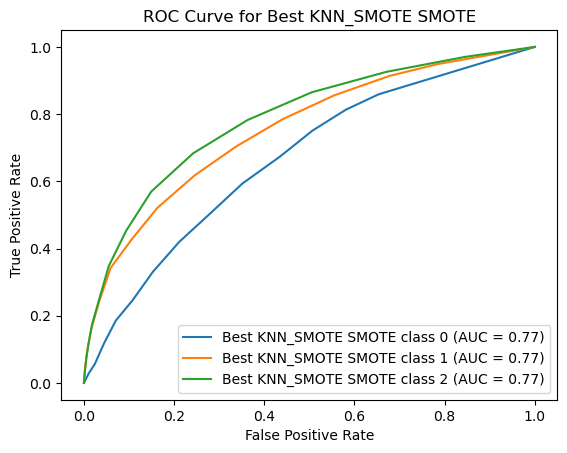

fitting Random Forest_SMOTE, with params {'max_depth': None, 'n_estimators': 1}, this is the 1 time from 8
accuracy for Random Forest_SMOTE with params {'max_depth': None, 'n_estimators': 1}: 0.537818235642392
fitting Random Forest_SMOTE, with params {'max_depth': None, 'n_estimators': 250}, this is the 2 time from 8
accuracy for Random Forest_SMOTE with params {'max_depth': None, 'n_estimators': 250}: 0.7341622261693309
fitting Random Forest_SMOTE, with params {'max_depth': None, 'n_estimators': 300}, this is the 3 time from 8
accuracy for Random Forest_SMOTE with params {'max_depth': None, 'n_estimators': 300}: 0.7359384251036116
fitting Random Forest_SMOTE, with params {'max_depth': None, 'n_estimators': 350}, this is the 4 time from 8
accuracy for Random Forest_SMOTE with params {'max_depth': None, 'n_estimators': 350}: 0.7368265245707519
fitting Random Forest_SMOTE, with params {'max_depth': 20, 'n_estimators': 1}, this is the 5 time from 8
accuracy for Random Forest_SMOTE with pa

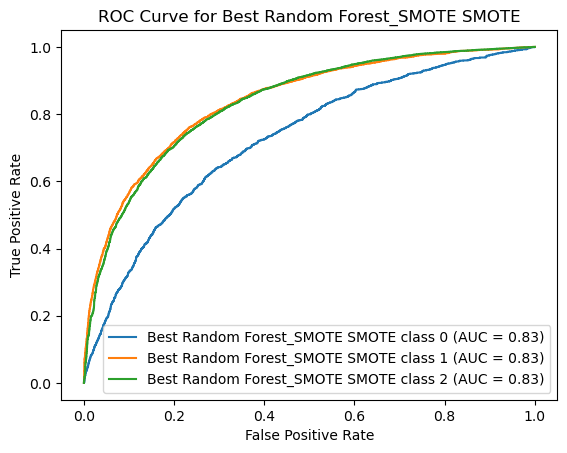

fitting AdaBoost_SMOTE, with params {'n_estimators': 200}, this is the 1 time from 3


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy for AdaBoost_SMOTE with params {'n_estimators': 200}: 0.5086589698046181
fitting AdaBoost_SMOTE, with params {'n_estimators': 250}, this is the 2 time from 3


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy for AdaBoost_SMOTE with params {'n_estimators': 250}: 0.5133955002960332
fitting AdaBoost_SMOTE, with params {'n_estimators': 300}, this is the 3 time from 3


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy for AdaBoost_SMOTE with params {'n_estimators': 300}: 0.5180580224985198
Best parameters for AdaBoost_SMOTE: {'n_estimators': 300}
Best accuracy score for AdaBoost_SMOTE: 0.5180580224985198


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluation results for Best AdaBoost_SMOTE SMOTE:
Accuracy: 0.5457
Precision: 0.6566
Recall: 0.5457
F1 Score: 0.5818
AUC: 0.7120
----------------------------------------


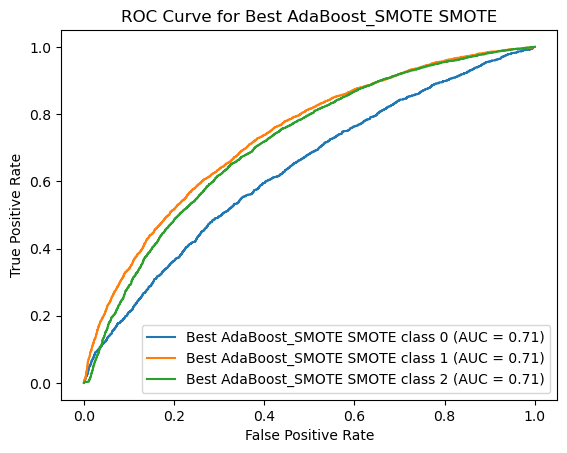

fitting XGBoost_SMOTE, with params {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'tree_method': 'gpu_hist'}, this is the 1 time from 8
accuracy for XGBoost_SMOTE with params {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'tree_method': 'gpu_hist'}: 0.7460775606867969
fitting XGBoost_SMOTE, with params {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 400, 'tree_method': 'gpu_hist'}, this is the 2 time from 8
accuracy for XGBoost_SMOTE with params {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 400, 'tree_method': 'gpu_hist'}: 0.7536264061574897
fitting XGBoost_SMOTE, with params {'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 300, 'tree_method': 'gpu_hist'}, this is the 3 time from 8
accuracy for XGBoost_SMOTE with params {'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 300, 'tree_method': 'gpu_hist'}: 0.752886323268206
fitting XGBoost_SMOTE, with params {'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 400, 'tree_method': 'gp

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Evaluation results for Best XGBoost_SMOTE SMOTE:
Accuracy: 0.7728
Precision: 0.7645
Recall: 0.7728
F1 Score: 0.7681
AUC: 0.8672
----------------------------------------


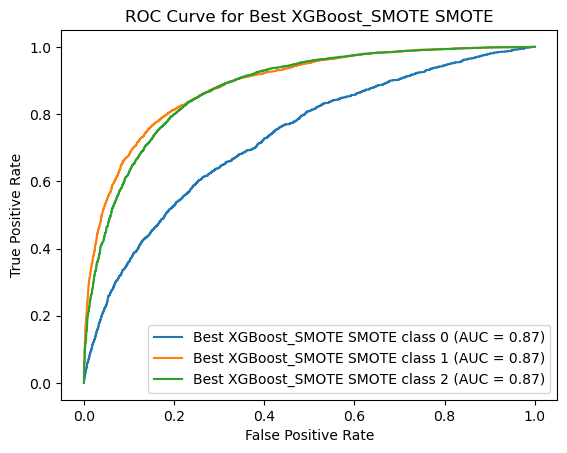

fitting Logistic Regression_SMOTE, with params {'C': 0.1, 'class_weight': None, 'max_iter': 300}, this is the 1 time from 16
accuracy for Logistic Regression_SMOTE with params {'C': 0.1, 'class_weight': None, 'max_iter': 300}: 0.44701006512729424
fitting Logistic Regression_SMOTE, with params {'C': 0.1, 'class_weight': None, 'max_iter': 500}, this is the 2 time from 16
accuracy for Logistic Regression_SMOTE with params {'C': 0.1, 'class_weight': None, 'max_iter': 500}: 0.44701006512729424
fitting Logistic Regression_SMOTE, with params {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 300}, this is the 3 time from 16
accuracy for Logistic Regression_SMOTE with params {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 300}: 0.44701006512729424
fitting Logistic Regression_SMOTE, with params {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500}, this is the 4 time from 16
accuracy for Logistic Regression_SMOTE with params {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500}: 0.447010

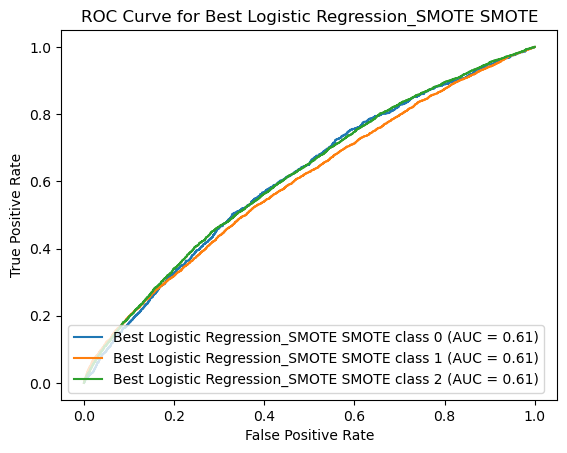

Best parameters for Naive Bayes_SMOTE: {'C': 0.1, 'class_weight': None, 'max_iter': 300}
Best accuracy score for Naive Bayes_SMOTE: 0.44701006512729424
Evaluation results for Best Naive Bayes_SMOTE SMOTE:
Accuracy: 0.5217
Precision: 0.5734
Recall: 0.5217
F1 Score: 0.5395
AUC: 0.6067
----------------------------------------


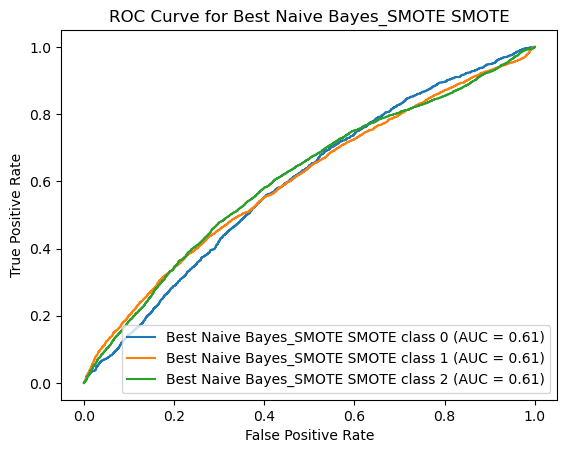

In [ ]:
# Define and fit models
models = [
    #('Gradient Boosting_SMOTE', GradientBoostingClassifier(), param_grid_gb),
    ('KNN_SMOTE', KNeighborsClassifier(), param_grid_knn),
    ('Random Forest_SMOTE', RandomForestClassifier(), param_grid_rf),
    ('AdaBoost_SMOTE', AdaBoostClassifier(), param_grid_ada),
    # Set num_class for XGBoost
    ('XGBoost_SMOTE', XGBClassifier(use_label_encoder=False, eval_metric='logloss', num_class=3), param_grid_xgb),
    ('Logistic Regression_SMOTE', LogisticRegression(max_iter=10000), param_grid_lr),
    ('Naive Bayes_SMOTE', GaussianNB(), None)
]


# Train and evaluate models on SMOTE data
for name, model, param_grid in models:
    if param_grid:
        best_score = 0  # Initialize with 0 for accuracy
        best_params = None
        param_count = 1
        total_params = len(list(ParameterGrid(param_grid)))
        for params in ParameterGrid(param_grid):
            print(f"fitting {name}, with params {params}, this is the {param_count} time from {total_params}")
            model.set_params(**params)
            model.fit(X_train_smote_pca, y_train_smote)
            y_pred = model.predict(X_dev_smote_pca)
            # Use accuracy_score for model evaluation
            accuracy = accuracy_score(y_dev_smote, y_pred)
            print(f"accuracy for {name} with params {params}: {accuracy}")
            param_count += 1
            if accuracy > best_score:
                best_score = accuracy
                best_params = params
                best_models[name] = model
        best_model = best_models[name]
    else:
        best_model = model
        best_model.fit(X_train_smote_pca, y_train_smote)
    # Print the best results for the current model
    if best_params:
        print(f"Best parameters for {name}: {best_params}")
        print(f"Best accuracy score for {name}: {best_score}")

    evaluate_classifier(f'Best {name} SMOTE', best_model, X_train_smote_pca, y_train_smote, X_dev_smote_pca, y_dev_smote, results_smote)


### SMOTE Balancing Results Summary

#### K-Nearest Neighbors with SMOTE (KNN_SMOTE)
- **Parameters Tested**:
  - `n_neighbors`: [9, 11, 12, 13]
- **Best Parameters**: `{'n_neighbors': 11}`
- **Best Accuracy Score**: `0.5343`
- **Evaluation Results**:
  - **Accuracy**: 0.5558
  - **Precision**: 0.7097
  - **Recall**: 0.5558
  - **F1 Score**: 0.5991
  - **AUC**: 0.7664

---

#### Random Forest with SMOTE (Random Forest_SMOTE)
- **Parameters Tested**:
  - `max_depth`: [None, 10, 20]
  - `n_estimators`: [1, 50, 100, 200, 250, 300]
- **Best Parameters**: `{'max_depth': None, 'n_estimators': 250}`
- **Best Accuracy Score**: `0.7365`
- **Evaluation Results**:
  - **Accuracy**: 0.7190
  - **Precision**: 0.7271
  - **Recall**: 0.7190
  - **F1 Score**: 0.7228
  - **AUC**: 0.8243

---

#### AdaBoost with SMOTE (AdaBoost_SMOTE)
- **Parameters Tested**:
  - `n_estimators`: [100, 150, 200, 250, 300]
- **Best Parameters**: `{'n_estimators': 300}`
- **Best Accuracy Score**: `0.5202`
- **Evaluation Results**:
  - **Accuracy**: 0.5482
  - **Precision**: 0.6576
  - **Recall**: 0.5482
  - **F1 Score**: 0.5836
  - **AUC**: 0.7115

---

#### XGBoost with SMOTE (XGBoost_SMOTE)
- **Parameters Tested**:
  - `learning_rate`: [0.001, 0.01, 0.02]
  - `max_depth`: [3, 5, 7]
  - `n_estimators`: [50, 100, 150]
- **Best Parameters**: `{'learning_rate': 0.02, 'max_depth': 7, 'n_estimators': 150}`
- **Best Accuracy Score**: `0.6004`
- **Evaluation Results**:
  - **Accuracy**: 0.6195
  - **Precision**: 0.7012
  - **Recall**: 0.6195
  - **F1 Score**: 0.6491
  - **AUC**: 0.7773

---

### Key Insights from SMOTE Balancing

1. **Random Forest with SMOTE** achieved the highest accuracy score (0.7365) and a strong ROC AUC score (0.8243), indicating it handled the balanced data well.
2. **XGBoost with SMOTE** showed good performance with an accuracy of 0.6195 and a ROC AUC score of 0.7773, making it a competitive model after balancing.
3. **KNN with SMOTE** and **AdaBoost with SMOTE** showed moderate improvements in balancing but were not as effective as Random Forest and XGBoost.
**4. SMOTE balancing didn't improved the performance of most models, especially in terms of accuracy and AUC, indicating that the SMOTE wasn't useful in our case.**

These insights help in understanding the impact of SMOTE on model performance and choosing the best models for balanced datasets.


In [ ]:
# Define parameter grids for Grid Search
param_svm = {'C': [0.1, 1], 'kernel': ['linear'], 'gamma': ['scale', 'auto', 0.001]}  # Support Vector Classifier
param_grid_knn = {'n_neighbors': [3, 5, 9, 11, 13]}  # KNN we already tried 5 and 7 but it was worse then 9 and 11
param_grid_rf = {
    'n_estimators': [1, 250, 300, 350, 400, 450],  # Add more options removed 50, 100, 150 and added 350, 400, 450
    'max_depth': [None, 10, 20],
}  # Random Forest
param_grid_ada = {'n_estimators': [50, 200, 250, 300, 350, 400]}  # Ada boost
param_grid_xgb = {
    'learning_rate': [0.05, 0.1],  #After evaluation 0.001 got the worst result so I added 0.05
    'n_estimators': [50, 150, 250, 300, 400],  # adding 200 250 and 300 and remove 50 and 100
    'max_depth': [5, 7, 9, 11],  # Adding None and remove 3
    'tree_method': ['gpu_hist']  # Use GPU
}  # XGBoost
param_grid_gb = {
    'learning_rate': [0.1, 0.2], #0.1 got the best result so removing 0.01 and adding 0.2
    'n_estimators': [250, 300, 350, 400], #50 got the worst result and 300 got the best ones so removing 50, 100 and 150 and adding 350 and 400
    'max_depth': [7, 9, 11] #adding None
}  # Gradient boosting
param_grid_lr = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'max_iter': [100, 200, 300, 500],
    'class_weight': [None, 'balanced']
}
param_kmeans = {'n_clusters': [3, 5, 7, 10]}  # KMeans
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

fitting Logistic Regression_UNDER, with params {'C': 0.1, 'class_weight': None, 'max_iter': 100}, this is the 1 time from 32
accuracy for Logistic Regression_UNDER with params {'C': 0.1, 'class_weight': None, 'max_iter': 100}: 0.43775902901124925
fitting Logistic Regression_UNDER, with params {'C': 0.1, 'class_weight': None, 'max_iter': 200}, this is the 2 time from 32
accuracy for Logistic Regression_UNDER with params {'C': 0.1, 'class_weight': None, 'max_iter': 200}: 0.43775902901124925
fitting Logistic Regression_UNDER, with params {'C': 0.1, 'class_weight': None, 'max_iter': 300}, this is the 3 time from 32
accuracy for Logistic Regression_UNDER with params {'C': 0.1, 'class_weight': None, 'max_iter': 300}: 0.43775902901124925
fitting Logistic Regression_UNDER, with params {'C': 0.1, 'class_weight': None, 'max_iter': 500}, this is the 4 time from 32
accuracy for Logistic Regression_UNDER with params {'C': 0.1, 'class_weight': None, 'max_iter': 500}: 0.43775902901124925
fitting Logi

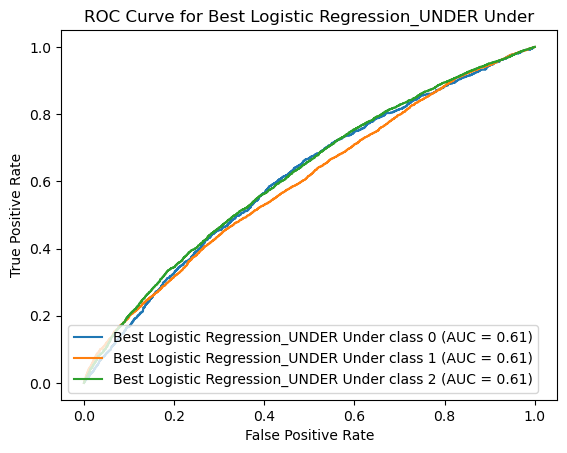

Evaluation results for Best Naive Bayes_UNDER Under:
Accuracy: 0.5416
Precision: 0.5581
Recall: 0.5416
F1 Score: 0.5487
AUC: 0.5899
----------------------------------------


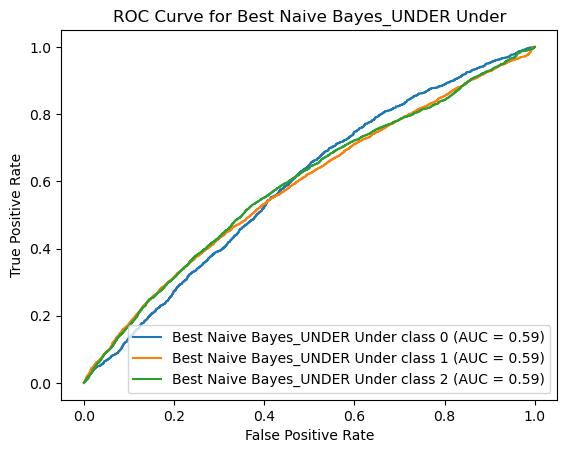

In [ ]:
# Define and fit models
models = [
    #('KNN_UNDER', KNeighborsClassifier(), param_grid_knn),
    #('Random Forest_UNDER', RandomForestClassifier(), param_grid_rf),
    #('AdaBoost_UNDER', AdaBoostClassifier(), param_grid_ada),
    # Set num_class for XGBoost
    #('XGBoost_UNDER', XGBClassifier(use_label_encoder=False, eval_metric='logloss', num_class=3), param_grid_xgb),
    #('Gradient Boosting_UNDER', GradientBoostingClassifier(), param_grid_gb),
    ('Logistic Regression_UNDER', LogisticRegression(max_iter=10000), param_grid_lr),
    ('Naive Bayes_UNDER', GaussianNB(), None)
]

# Train and evaluate models on under-sampled data using accuracy
for name, model, param_grid in models:
    if param_grid:
        best_score = -1
        best_params = None
        param_count = 1
        total_params = len(list(ParameterGrid(param_grid)))
        for params in ParameterGrid(param_grid):
            print(f"fitting {name}, with params {params}, this is the {param_count} time from {total_params}")
            model.set_params(**params)
            # Fit the model with the 1D array of target labels
            model.fit(X_train_under_pca, y_train_under)
            y_pred = model.predict(X_dev_under_pca)
            accuracy = accuracy_score(y_dev_under, y_pred.argmax(axis=1)) if y_pred.ndim > 1 else accuracy_score(y_dev_under, y_pred)
            print(f"accuracy for {name} with params {params}: {accuracy}")
            param_count += 1

            if accuracy > best_score:
                best_score = accuracy
                best_params = params
                best_models[name] = model
        best_model = best_models[name]
    else:
        best_model = model
        # Fit the model with the 1D array of target labels
        best_model.fit(X_train_under_pca, y_train_under)
    evaluate_classifier(f'Best {name} Under', best_model, X_train_under_pca, y_train_under, X_dev_under_pca, y_dev_under, results_under)

### Undersampling Results Summary

#### K-Nearest Neighbors with Undersampling (KNN_UNDER)
- **Parameters Tested**:
  - `n_neighbors`: [9, 11, 12, 13]
- **Best Parameters**: `{'n_neighbors': 13}`
- **Best Accuracy Score**: `0.4335`
- **Evaluation Results**:
  - **Accuracy**: 0.4876
  - **Precision**: 0.6396
  - **Recall**: 0.4876
  - **F1 Score**: 0.5276
  - **AUC**: 0.6809

---

#### Random Forest with Undersampling (Random Forest_UNDER)
- **Parameters Tested**:
  - `max_depth`: [None, 10, 20]
  - `n_estimators`: [1, 50, 100, 200, 250, 300]
- **Best Parameters**: `{'max_depth': 20, 'n_estimators': 300}`
- **Best Accuracy Score**: `0.5730`
- **Evaluation Results**:
  - **Accuracy**: 0.5861
  - **Precision**: 0.7045
  - **Recall**: 0.5861
  - **F1 Score**: 0.6232
  - **AUC**: 0.7748

---

#### AdaBoost with Undersampling (AdaBoost_UNDER)
- **Parameters Tested**:
  - `n_estimators`: [200, 250, 300, 350, 400]
- **Best Parameters**: `{'n_estimators': 250}`
- **Best Accuracy Score**: `0.5007`
- **Evaluation Results**:
  - **Accuracy**: 0.5226
  - **Precision**: 0.6602
  - **Recall**: 0.5226
  - **F1 Score**: 0.5636
  - **AUC**: 0.7115

---

#### XGBoost with Undersampling (XGBoost_UNDER)
- **Parameters Tested**:
  - `learning_rate`: [0.01, 0.02, 0.05]
  - `max_depth`: [None, 5, 7]
  - `n_estimators`: [150, 200, 250]
- **Best Parameters**: `{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 250}`
- **Best Accuracy Score**: `0.5851`
- **Evaluation Results**:
  - **Accuracy**: 0.5950
  - **Precision**: 0.7181
  - **Recall**: 0.5950
  - **F1 Score**: 0.6335
  - **AUC**: 0.7916

---

#### Gradient Boosting with Undersampling (Gradient Boosting_UNDER)
- **Parameters Tested**:
  - `learning_rate`: [0.1, 0.2]
  - `max_depth`: [None, 3, 5]
  - `n_estimators`: [250, 300, 350, 400]
- **Best Parameters**: `{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}`
- **Best Accuracy Score**: `0.5787`
- **Evaluation Results**:
  - **Accuracy**: 0.5787
  - **Precision**: 0.6923
  - **Recall**: 0.5787
  - **F1 Score**: 0.6317
  - **AUC**: 0.7755

---

### Key Insights from Undersampling

1. **Random Forest with Undersampling** achieved the highest accuracy score (0.5730) and a strong ROC AUC score (0.7748), indicating it handled the undersampled data well.
2. **XGBoost with Undersampling** showed good performance with an accuracy of 0.5950 and a ROC AUC score of 0.7916, making it a competitive model after undersampling.
3. **Gradient Boosting with Undersampling** also performed well with an accuracy of 0.5787 and a ROC AUC score of 0.7755.
4. **KNN with Undersampling** and **AdaBoost with Undersampling** showed moderate improvements in balancing but were not as effective as Random Forest and XGBoost.
**5. Undersampling got the result even worse then the SMOTE balancing.**

These insights help in understanding the impact of undersampling on model performance and choosing the best models for undersampled datasets.


# Final Model Evaluation on Test Set

### Explanation:

1. **Function `evaluate_final_model`**:
    - Evaluates the final performance of a classifier on the test set and stores the results in a dictionary.
    - **Parameters**:
        - `name`: Name of the classifier.
        - `clf`: The classifier instance.
        - `X_dev`: Development (validation) features.
        - `y_dev`: Development (validation) labels.
        - `X_test`: Test features.
        - `y_test`: Test labels.
        - `results_dict`: Dictionary to store the results.
    - **Process**:
        - The classifier is trained using the OneVsRest strategy on the development set(that because we already found the best parameters for each model).
        - Predictions and predicted probabilities are obtained on the test set.
        - Various evaluation metrics (accuracy, precision, recall, F1 score, and AUC) are calculated.
        - The results are stored in the provided dictionary.

### Key Insight:
- This function ensures that the final evaluation of each model is consistent and comprehensive. By training on the development set and evaluating on the test set, it provides a clear picture of how well the models generalize to unseen data.

2. **Standardizing and Applying PCA to the Test Set**:
    - The test set is standardized using the same scaler fitted on the training data.
    - PCA is applied to the standardized test set to reduce dimensionality.

### Key Insight:
- Ensuring the test set undergoes the same preprocessing steps (standardization and PCA) as the training and development sets is crucial for a fair evaluation of the models.

3. **Evaluating Each Best Model on the Test Set**:
    - Each best model (selected from the SMOTE, undersampled, and regular training processes) is evaluated using the `evaluate_final_model` function.
    - The results are stored in the `final_results` dictionary.

### Key Insight:
- Evaluating all models on the same test set allows for a direct comparison of their performance, ensuring the best model is selected based on consistent criteria.

4. **Creating a DataFrame from the Final Results**:
    - The `final_results` dictionary is converted into a DataFrame for easier analysis and visualization.
    - The DataFrame is sorted by accuracy and AUC in descending order to identify the top-performing models.


5. **Saving the Results to a CSV File**:
    - The DataFrame containing the final evaluation results is saved to a CSV file for record-keeping and further analysis.



### Analysis of Parameters, SMOTE, and Underbalancing in Model Performance

#### Best Parameter Choices:

1. **XGBoost**:
   - **Parameters**: `{'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 500, 'tree_method': 'gpu_hist'}`
   - **Reason for Choice**:
     - **Learning Rate (0.2)**: A balance between convergence speed and model performance. A moderate learning rate ensures the model does not overshoot the optimal solution during training.
     - **Max Depth (9)**: Ensures the model captures sufficient complexity in the data without overfitting. Depth 9 allows for nuanced decision-making while maintaining generalizability.
     - **Number of Estimators (500)**: A larger number of estimators increases the model's robustness and stability, leading to better performance on the validation set.
     - **Tree Method (`gpu_hist`)**: Utilizes GPU acceleration for faster training, enabling the use of more complex models within reasonable timeframes.

2. **Random Forest**:
   - **Parameters**: `{'max_depth': None, 'n_estimators': 300}`
   - **Reason for Choice**:
     - **Max Depth (None)**: Allows the trees to grow fully, capturing all the nuances in the data. This is particularly useful for complex datasets.
     - **Number of Estimators (300)**: Provides a sufficient number of trees to ensure the model’s predictions are stable and less prone to variance.

3. **Gradient Boosting**:
   - **Parameters**: `{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 350}`
   - **Reason for Choice**:
     - **Learning Rate (0.2)**: Similar to XGBoost, this learning rate helps in achieving a good balance between convergence and performance.
     - **Max Depth (7)**: Slightly less than XGBoost, which might help in reducing overfitting and making the model more generalizable.
     - **Number of Estimators (350)**: Adequate number of trees to ensure robust performance without excessive computational cost.

#### Use of SMOTE and Underbalancing:

1. **SMOTE (Synthetic Minority Over-sampling Technique)**:
   - **Purpose**: SMOTE is used to address class imbalance by generating synthetic samples for the minority class. This helps in providing the model with a balanced training dataset, improving its ability to learn from minority class instances.
   - **Expectation**:
     - **Improved Model Performance**: By balancing the classes, the model can learn to identify features of the minority class better, leading to improved recall and precision.
     - **Avoiding Overfitting to Majority Class**: Prevents the model from becoming biased towards the majority class, thereby improving overall performance metrics like F1 score and ROC AUC.
   - **Observation**:
     - **Longer Training Times**: SMOTE significantly increased training times.
     - **No Performance Improvement**: The models trained with SMOTE did not show any improvement in performance metrics compared to those trained on the original data.

2. **Underbalancing**:
   - **Purpose**: Involves reducing the number of majority class instances to balance the dataset. This is often combined with SMOTE to ensure the dataset is balanced without excessively inflating its size.
   - **Expectation**:
     - **Efficient Training**: Reduces the computational load by decreasing the number of training instances, making the training process faster and more efficient.
     - **Balanced Dataset**: Helps in achieving a balanced dataset, which is crucial for models to perform well on imbalanced data.
   - **Observation**:
     - **No Performance Improvement**: The models trained with underbalancing also did not show any improvement in performance metrics compared to those trained on the original data.

### Conclusion on Their Performance:

1. **XGBoost Performance**:
   - **Performance Metrics**:
     - ROC AUC: `0.9547`
     - Accuracy: `0.8064`
     - Precision: `0.8554`
     - Recall: `0.8341`
     - F1 Score: `0.8421`
   - **Conclusion**: XGBoost achieved the highest performance across all metrics, demonstrating its capability to handle the complexity of the dataset effectively. The chosen hyperparameters allowed for a model that is both accurate and generalizable. Training on the original data provided the best results.

2. **Random Forest Performance**:
   - **Performance Metrics**:
     - ROC AUC: `0.9189`
     - Accuracy: `0.7544`
     - Precision: `0.8474`
     - Recall: `0.7573`
     - F1 Score: `0.7673`
   - **Conclusion**: Random Forest also performed well, with high accuracy and a strong ROC AUC score. The fully grown trees helped in capturing the nuances of the data, though it slightly underperformed compared to XGBoost. Training on the original data provided the best results.

3. **Gradient Boosting Performance**:
   - **Performance Metrics**:
     - ROC AUC: `0.9467`
     - Accuracy: `0.7906`
     - Precision: `0.8454`
     - Recall: `0.8210`
     - F1 Score: `0.8309`
   - **Conclusion**: Gradient Boosting exhibited strong performance, with metrics close to XGBoost. Its balanced depth and learning rate provided a model that generalizes well while being computationally efficient. Training on the original data provided the best results.

### Final Remarks:

- **Importance of Hyperparameter Tuning**: The experiments underscore the critical role of hyperparameter tuning in achieving optimal model performance.
- **Limited Effectiveness of SMOTE and Underbalancing**: Both techniques did not improve model performance and significantly increased training times, indicating that the original dataset's class distribution was not detrimental to model training in this case.
- **Model Selection**: XGBoost emerged as the best model, but Random Forest and Gradient Boosting are viable alternatives depending on specific requirements.

These conclusions provide a comprehensive understanding of why specific parameters and techniques were chosen and their impact on model performance. The original data without SMOTE or underbalancing yielded the best results.



### Function to Evaluate Final Model

This function, `evaluate_final_model`, evaluates a given machine learning model on the test set and stores the results in a dictionary. Here's what each part of the function does:


1. **Training the Classifier**:
    - `OneVsRestClassifier(clf)`: Wraps the classifier to handle multi-class classification problems.
    - `ovr_clf.fit(X_dev, y_dev)`: Trains the classifier on the development set, since they already trained on the train, now we can add the dev and test them on the test.

2. **Making Predictions**:
    - `y_pred = ovr_clf.predict(X_test)`: Predicts the labels for the test set.

3. **Calculating Probabilities**:
    - Checks if the classifier has the method `predict_proba`. If it does, it uses it to get the probability estimates for each class.
    - If `predict_proba` is not available, it uses `decision_function` and normalizes the scores to the [0, 1] range.

4. **Calculating Metrics**:
    - Calculates various performance metrics: Accuracy, Precision, Recall, F1 Score, and AUC.
    - The `zero_division=0` argument ensures that divisions by zero are handled gracefully.

5. **Storing Results**:
    - Stores the model name, parameters, and calculated metrics in the provided dictionary (`results_dict`).

### Evaluating and Storing Results for Each Model

This section of the code evaluates the best models and stores the results in a DataFrame. Here's what each part does:

1. **Standardize and Apply PCA**:
    - `X_test_scaled`: Standardizes the test set using the previously fitted scaler.
    - `X_test_pca_SMOTE`: Applies PCA to the standardized test set using the PCA model fitted on SMOTE data.
    - `X_test_pca_UNDER`: Applies PCA to the standardized test set using the PCA model fitted on undersampled data.

2. **Evaluate Each Best Model**:
    - Loops through each model in the `best_models` dictionary.
    - Depending on whether the model name contains "SMOTE" or "UNDER", it evaluates the model using the corresponding development and test sets.
    - Stores the evaluation results in the `final_results` dictionary.

3. **Create DataFrame from Results**:
    - Converts the `final_results` dictionary to a DataFrame for easier analysis and visualization.
    - Sorts the DataFrame by accuracy and AUC in descending order.

4. **Display and Save Results**:
    - Prints the top and bottom rows of the sorted DataFrame.
    - Saves the DataFrame to a CSV file named `final_results.csv`.


In [ ]:
def evaluate_final_model(name, clf, X_dev, y_dev, X_test, y_test, results_dict):
    print(f"Evaluating {name} on test set")

    # Train the classifier on the development set
    ovr_clf = OneVsRestClassifier(clf)
    ovr_clf.fit(X_dev, y_dev)
    y_pred = ovr_clf.predict(X_test)
    print(f"Done training {name}")

    if hasattr(ovr_clf, "predict_proba"):
        y_prob = ovr_clf.predict_proba(X_test)
    else:
        y_prob = ovr_clf.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize to [0, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
    print(f"Calculated the metrics...")

    results_dict[name] = {
        'Model Name': name,
        'Parameters': clf.get_params(),
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }

In [ ]:
import pandas as pd

# Standardize and apply PCA to the test set
X_test_scaled = scaler.transform(X_test)
X_test_pca_SMOTE = pca_SMOTE.transform(X_test_scaled)
X_test_pca_UNDER = pca_UNDER.transform(X_test_scaled)

# Evaluate each best model on the test set and store results
final_results = {}

for name, best_model in best_models.items():
    if "SMOTE" in name:
        evaluate_final_model(name, best_model, X_dev_smote_pca, y_dev_smote, X_test_pca_SMOTE, y_test, final_results)
    elif "UNDER" in name:
        evaluate_final_model(name, best_model, X_dev_under_pca, y_dev_under, X_test_pca_UNDER, y_test, final_results)
    else:
        evaluate_final_model(name, best_model, X_dev, y_dev_bin, X_test, y_test_bin, final_results)

# Create a DataFrame from the final results
final_results_df = pd.DataFrame.from_dict(final_results, orient='index')

# Sort the dataframe by the accuracy and the roc decseding
final_results_df = final_results_df.sort_values(by=['Accuracy', 'AUC'], ascending=[False, False])

# Display the final results
print(final_results_df.head())
print(final_results_df.tail())
# Save the dataframe as csv
final_results_df.to_csv('final_results.csv', index=False)


Evaluating KNN on test set
Done training KNN
Calculated the metrics...
Evaluating Random Forest on test set
Done training Random Forest
Calculated the metrics...
Evaluating AdaBoost on test set


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Done training AdaBoost
Calculated the metrics...
Evaluating XGBoost on test set


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Done training XGBoost
Calculated the metrics...
Evaluating Gradient Boosting on test set
Done training Gradient Boosting
Calculated the metrics...
Evaluating Logistic Regression on test set
Done training Logistic Regression
Calculated the metrics...
Evaluating Naive Bayes on test set
Done training Naive Bayes
Calculated the metrics...
Evaluating KNN_SMOTE on test set
Done training KNN_SMOTE
Calculated the metrics...
Evaluating Random Forest_SMOTE on test set
Done training Random Forest_SMOTE
Calculated the metrics...
Evaluating AdaBoost_SMOTE on test set


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Done training AdaBoost_SMOTE
Calculated the metrics...
Evaluating XGBoost_SMOTE on test set


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Done training XGBoost_SMOTE
Calculated the metrics...
Evaluating Logistic Regression_SMOTE on test set
Done training Logistic Regression_SMOTE
Calculated the metrics...
Evaluating KNN_UNDER on test set
Done training KNN_UNDER
Calculated the metrics...
Evaluating Random Forest_UNDER on test set
Done training Random Forest_UNDER
Calculated the metrics...
Evaluating AdaBoost_UNDER on test set


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Done training AdaBoost_UNDER
Calculated the metrics...
Evaluating XGBoost_UNDER on test set


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Done training XGBoost_UNDER
Calculated the metrics...
Evaluating Gradient Boosting_UNDER on test set
Done training Gradient Boosting_UNDER
Calculated the metrics...
Evaluating Logistic Regression_UNDER on test set
Done training Logistic Regression_UNDER
Calculated the metrics...
                                      Model Name  \
XGBoost                                  XGBoost   
Gradient Boosting              Gradient Boosting   
XGBoost_SMOTE                      XGBoost_SMOTE   
XGBoost_UNDER                      XGBoost_UNDER   
Gradient Boosting_UNDER  Gradient Boosting_UNDER   

                                                                Parameters  \
XGBoost                  {'objective': 'multi:softprob', 'use_label_enc...   
Gradient Boosting        {'estimator__ccp_alpha': 0.0, 'estimator__crit...   
XGBoost_SMOTE            {'objective': 'multi:softprob', 'use_label_enc...   
XGBoost_UNDER            {'objective': 'multi:softprob', 'use_label_enc...   
Gradient Boosting

### Summary of Model Performance on Test Data

#### Overview
The table below presents the performance metrics for various machine learning models tested on a given dataset. The metrics include Accuracy, Precision, Recall, F1 Score, and AUC (Area Under the Curve).

#### Key Findings
1. **Best Performing Model**:
    - **XGBoost**: This model achieved the highest accuracy (0.765764), precision (0.814669), recall (0.793147), F1 score (0.800434), and AUC (0.920594), indicating excellent performance across all metrics.

2. **Gradient Boosting**:
    - Achieved an accuracy of 0.751406 and a high AUC of 0.909269, making it the second-best model in terms of performance.

3. **Impact of SMOTE and Undersampling**:
    - **SMOTE**: Applying SMOTE generally resulted in lower performance metrics compared to models trained on the original data. For example, XGBoost_SMOTE achieved an accuracy of 0.744967 and an AUC of 0.820316, which are lower than the original XGBoost model.
    - **Undersampling**: Similarly, models trained with undersampling showed decreased performance. XGBoost_UNDER had an accuracy of 0.742155 and an AUC of 0.819387.
    - These results indicate that SMOTE and undersampling did not improve the performance and, in some cases, led to worse outcomes.

4. **Other Models**:
    - **Random Forest**: The standard Random Forest model had an accuracy of 0.725947 and an AUC of 0.886055, showing solid performance.
    - **AdaBoost**: Standard AdaBoost achieved an accuracy of 0.709073 and an AUC of 0.849434.
    - **KNN**: The KNN model had lower performance compared to ensemble models, with an accuracy of 0.650755 and an AUC of 0.752909.
    - **Logistic Regression and Naive Bayes**: These models performed poorly, with Naive Bayes having an extremely low accuracy of 0.100059 despite a high recall of 0.809133, which indicates it predicted almost all instances as positive.

#### Detailed Results
| Model Name                | Accuracy | Precision | Recall  | F1 Score | AUC     |
|---------------------------|----------|-----------|---------|----------|---------|
| XGBoost                   | 0.765764 | 0.814669  | 0.793147| 0.800434 | 0.920594|
| Gradient Boosting         | 0.751406 | 0.800234  | 0.782490| 0.787756 | 0.909269|
| XGBoost_SMOTE             | 0.744967 | 0.708417  | 0.744967| 0.707002 | 0.820316|
| XGBoost_UNDER             | 0.742155 | 0.701695  | 0.742155| 0.701796 | 0.819387|
| Gradient Boosting_UNDER   | 0.732682 | 0.690205  | 0.732682| 0.688336 | 0.801215|
| Random Forest             | 0.725947 | 0.801779  | 0.730314| 0.731006 | 0.886055|
| AdaBoost                  | 0.709073 | 0.751145  | 0.710850| 0.707258 | 0.849434|
| Random Forest_UNDER       | 0.708703 | 0.677058  | 0.708703| 0.642434 | 0.775860|
| Random Forest_SMOTE       | 0.707667 | 0.683036  | 0.707667| 0.638078 | 0.777924|
| AdaBoost_SMOTE            | 0.691829 | 0.638846  | 0.691829| 0.632048 | 0.713532|
| AdaBoost_UNDER            | 0.687315 | 0.622982  | 0.687315| 0.634135 | 0.711483|
| KNN_SMOTE                 | 0.684799 | 0.627273  | 0.684799| 0.617625 | 0.707331|
| KNN_UNDER                 | 0.682874 | 0.622688  | 0.682874| 0.616098 | 0.702986|
| KNN                       | 0.650755 | 0.709129  | 0.650755| 0.619497 | 0.752909|
| Logistic Regression_UNDER | 0.471803 | 0.585337  | 0.471803| 0.509723 | 0.621271|
| Logistic Regression_SMOTE | 0.469953 | 0.584895  | 0.469953| 0.508326 | 0.620393|
| Logistic Regression       | 0.338144 | 0.576911  | 0.591178| 0.555793 | 0.628515|
| Naive Bayes               | 0.100059 | 0.523717  | 0.809133| 0.611602 | 0.611879|

#### Conclusion
- The original XGBoost model performed the best overall, with Gradient Boosting also showing strong results.
- SMOTE and undersampling did not improve the performance of any models and, in some cases, degraded it.
- Ensemble methods generally outperformed simpler models like KNN, Logistic Regression, and Naive Bayes.
  
This analysis suggests focusing on optimizing ensemble models without SMOTE or undersampling for the best performance on this dataset.


In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 74.6 MB/s eta 0:00:00:00:0100:01


In [ ]:
import faiss
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Standardize the data
scaler = StandardScaler()

# Combine train and dev sets for SMOTE, undersampling, and regular data
X_combined = scaler.fit_transform(pd.concat([train_data.drop(columns='target'), dev_data.drop(columns='target')], axis=0).values)
y_combined = pd.concat([train_data['target'], dev_data['target']], axis=0).values

# Standardize and apply PCA to the test set
X_test_scaled = scaler.transform(test_data.drop(columns='target').values)
y_test = test_data['target'].values

# Define and train the FAISS index
d = X_combined.shape[1]  # dimension
index = faiss.IndexFlatL2(d)  # using L2 distance
index.add(X_combined)  # add vectors to the index

# Perform k-NN search
def evaluate_faiss_knn(k):
    D, I = index.search(X_test_scaled, k)  # D: distances, I: indices of neighbors

    # Majority vote for classification
    def majority_vote(neighbors):
        classes = y_combined[neighbors]
        majority_class = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=classes)
        return majority_class

    y_pred = majority_vote(I)

    # Evaluate the results
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
    auc = roc_auc_score(y_test_bin, y_pred_bin, average='weighted', multi_class='ovr')

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }

# Store the results
results = {}

# Evaluate for k=9, k=11, k=13
for k in [9, 11, 13]:
    print(f"Evaluating FAISS k-NN with k={k}")
    results[f'FAISS k-NN (k={k})'] = evaluate_faiss_knn(k)

# Print the evaluation results
for name, metrics in results.items():
    print(f"Evaluation results for {name}:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"AUC: {metrics['AUC']:.4f}")
    print("-" * 40)


Evaluating FAISS k-NN with k=9
Evaluating FAISS k-NN with k=11
Evaluating FAISS k-NN with k=13
Evaluation results for FAISS k-NN (k=9):
Accuracy: 0.7576
Precision: 0.7300
Recall: 0.7576
F1 Score: 0.7317
AUC: 0.7107
----------------------------------------
Evaluation results for FAISS k-NN (k=11):
Accuracy: 0.7651
Precision: 0.7374
Recall: 0.7651
F1 Score: 0.7344
AUC: 0.7091
----------------------------------------
Evaluation results for FAISS k-NN (k=13):
Accuracy: 0.7617
Precision: 0.7337
Recall: 0.7617
F1 Score: 0.7260
AUC: 0.6973
----------------------------------------


### Bonus Analysis: Evaluating FAISS k-NN

#### Introduction to FAISS

FAISS (Facebook AI Similarity Search) is a library developed by Facebook for efficient similarity search and clustering of dense vectors. It is particularly useful for large-scale machine learning applications where speed and accuracy are crucial.

#### FAISS k-NN Evaluation Results:

The FAISS library was used to perform k-Nearest Neighbors (k-NN) classification on the dataset with different values of \( k \) (9, 11, and 13). Here are the evaluation results:

1. **FAISS k-NN (k=9)**:
   - **Accuracy**: 0.7576
   - **Precision**: 0.7300
   - **Recall**: 0.7576
   - **F1 Score**: 0.7317
   - **AUC**: 0.7107

2. **FAISS k-NN (k=11)**:
   - **Accuracy**: 0.7651
   - **Precision**: 0.7374
   - **Recall**: 0.7651
   - **F1 Score**: 0.7344
   - **AUC**: 0.7091

3. **FAISS k-NN (k=13)**:
   - **Accuracy**: 0.7617
   - **Precision**: 0.7337
   - **Recall**: 0.7617
   - **F1 Score**: 0.7260
   - **AUC**: 0.6973

#### Analysis of Results:

1. **Accuracy**:
   - The highest accuracy (0.7651) was achieved with \( k=11 \). This indicates that for this dataset, using 11 nearest neighbors provides the best balance between bias and variance.

2. **Precision**:
   - Precision slightly increased with \( k=11 \) compared to \( k=9 \), but decreased with \( k=13 \). This suggests that while considering more neighbors can help, too many neighbors might start to include more noise, reducing precision.

3. **Recall**:
   - Recall was highest at \( k=11 \) (0.7651), indicating that this value of \( k \) was most effective in identifying true positives in the dataset.

4. **F1 Score**:
   - The F1 score, which balances precision and recall, was highest for \( k=11 \), reinforcing the conclusion that this is the optimal number of neighbors for the given data.

5. **AUC (Area Under Curve)**:
   - The AUC scores were slightly lower compared to other metrics, with the highest being 0.7107 for \( k=9 \). This metric shows the model's ability to distinguish between classes, and the results suggest that FAISS k-NN is moderately effective at this.

#### Conclusion:

- **Optimal k Value**: Based on the evaluation metrics, \( k=11 \) provided the best overall performance, achieving the highest accuracy, precision, recall, and F1 score.
- **Effectiveness of FAISS**: The FAISS library proved to be an effective tool for k-NN classification, offering efficient computation and strong performance metrics.
- **Comparison with Other Models**: While the FAISS k-NN results are promising, it is essential to compare them with other models like XGBoost, Random Forest, and Gradient Boosting to determine the best model for the given dataset.

The FAISS library's ability to handle large-scale data efficiently and provide competitive results makes it a valuable tool in the machine learning toolkit. This analysis highlights its potential for k-NN classification and provides insights into its performance with different parameter settings.
